In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
from scipy.fftpack import fft, ifft, fftshift
import pandas as pd
from scipy import signal
from scipy.signal import * 

In [2]:
def ploting(x):
    plt.figure(figsize=(10,5));
    plt.plot(x);
    plt.show();

### Сформируем исследуемый (тестовый) сигнал, который будет содержать три гармонических составляющих с амплитудами 5, 3 и 2, соответственно.

In [3]:
n = 240;
# time vector
t = np.linspace(0, 1, n, endpoint=True)
# sine wave
def x_value(t):
    x = 5*np.sin(2*np.pi*1*t) + 3*np.sin(2*np.pi*4*t) + 2*np.sin(2*np.pi*6*t);
    return x;

In [4]:
x=x_value(t)

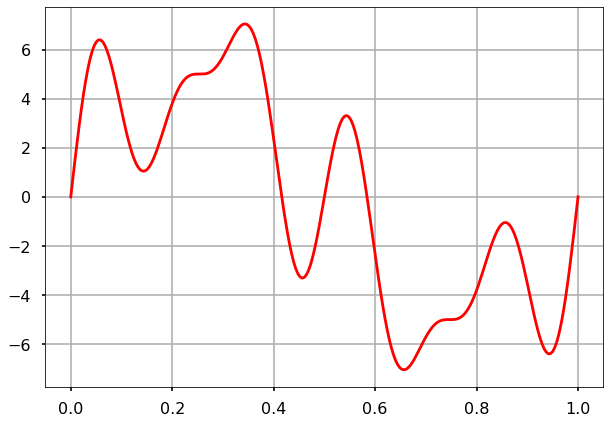

In [5]:
plt.figure(figsize=(10,7));
plt.plot(t,x, "r")
plt.grid()
plt.show()

## Оценим спектр сигнала, используя БДПФ (функция fft)

In [6]:
sp = fft(x)
N = len(sp)
nn = np.arange(N)
T = N/n
freq = nn/T

sp2=fftshift(sp)

C:\Users\Konstantin\AppData\Local\Temp\ipykernel_14440\2904703002.py:4: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(sp)/(0.5*n), 'b', \
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


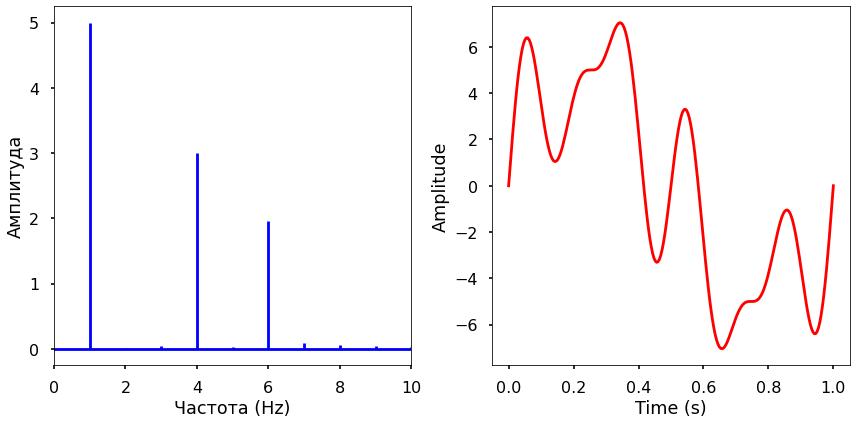

In [7]:
plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(sp)/(0.5*n), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Частота (Hz)')
plt.ylabel('Амплитуда')
plt.xlim(0,10)

plt.subplot(122)
plt.plot(t, ifft(sp), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

### Выполним анализ реального сигнала.

In [9]:
df=pd.read_csv("AKIP0001.CSV"); #Загрузка файла.

In [19]:
df.columns=["a1","a2","a3"]; # Обозначим оси в данных;

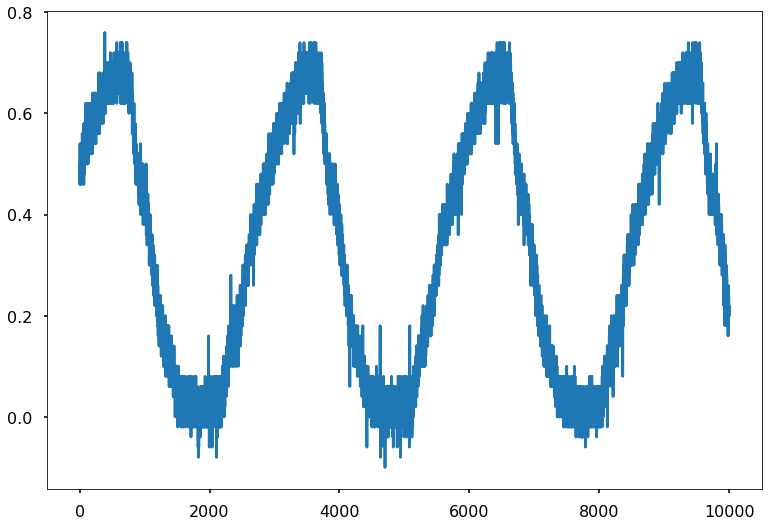

In [20]:
df["a2"][0:10000].plot(); # Визуализируем данные.

In [21]:
df_data=np.array(df["a2"][0:10000]); #Сформируем срез данных от 0 до 10 000.

### Сформируем функцию-фильтр скользящего среднего. Аргумент функции - это фильтруемый сигнал и окно фильтра.

In [22]:
def smooth(df, windows=10):
    dataM=[];
    for i in range(windows+1,len(df)-windows,1):
        dataM.append(np.mean(df[i-windows:i+windows]))
    return dataM;    

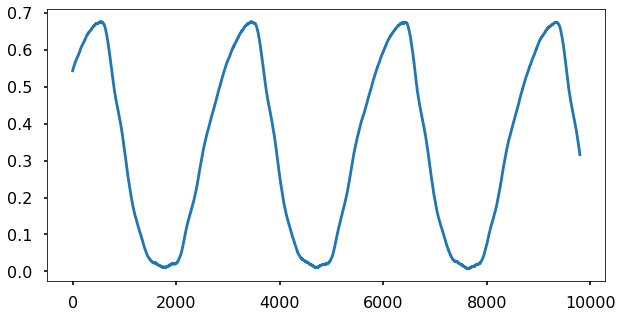

In [23]:
#Применим фильтр
fil_data=smooth(df_data,windows=100);
ploting(fil_data)

In [29]:
xn=df
# 3-order lowpass butterworth filter
b, a = butter(5, 0.2)
z = lfilter(b, a, xn)

wn = [0.01, 0.05, 0.1, 0.2]



In [30]:
# Calculate IIR filter
zz = np.zeros((nn.size, 4))
for i in range(4):
    b, a = butter(3, wn[i])
    zz[:, i] = lfilter(b, a, xn)


ValueError: could not broadcast input array from shape (39999,3) into shape (240,)

In [28]:
zz

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


In [ ]:

# Plot results
plt.figure(figsize=(16, 20), dpi=80)
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.plot(nn, xn, 'C0--', linewidth=1.5)
    plt.plot(nn, zz[:,i], 'C1', linewidth=2.5)
    plt.xlim()
    plt.grid(True)
    plt.legend(('Signal', 'Filtered, wn = {}'.format(wn[i])), loc='lower left')